In [1]:
import os
from pathlib import Path
import pymysql
import re
from datetime import datetime

from datetime import time

import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


DATABASE_NAME = "chatings"
HOST_NAME = "localhost"
USER_ID = "root"
USER_PASSWORD = "rootPW1!"
CHARSET = "utf8"
TXT_FOLDER_PATH = "chats"

In [2]:
conn = pymysql.connect(host=HOST_NAME, user=USER_ID, passwd=USER_PASSWORD, charset=CHARSET)
cursor = conn.cursor()

In [3]:
sql = 'USE %s ;'%DATABASE_NAME
cursor.execute(sql)
conn.commit()

In [4]:
sql = 'SELECT * FROM indexes;'
cursor.execute(sql)
conn.commit()
rows=cursor.fetchall()

In [7]:
ls=[]
for row in rows :
    if row[1]<10:
        table_name = str(row[0])+'0'+str(row[1])
    else:
        table_name = str(row[0])+str(row[1])
    sql='SELECT * FROM %schats;' %table_name
    cursor.execute(sql)
    conn.commit()
    results = cursor.fetchall()
    for result in results:
#         print(result)
        item = [result[0], result[0].year, result[0].month, result[0].day, result[0].hour, result[0].minute, result[1], result[2]]
        ls.append(item)

In [8]:
df_origin = pd.DataFrame(ls,columns=['time','year','month','day','hour','minute','sender','message'])

In [9]:
df_origin

,time,year,month,day,hour,minute,sender,message
0,2018-05-23 00:05:00,2018,5,23,0,5,A,ㅜㅠㅠㅠㅠ
1,2018-05-23 00:05:00,2018,5,23,0,5,A,안돼
2,2018-05-23 00:05:00,2018,5,23,0,5,A,의진이야 ㅠㅠㅠㅠ
3,2018-05-23 00:05:00,2018,5,23,0,5,A,자냐
4,2018-05-23 00:06:00,2018,5,23,0,6,B,ㅋㅋㅋㅋㅋㅋ
...,...,...,...,...,...,...,...,...
774285,2021-07-07 00:21:00,2021,7,7,0,21,B,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
774286,2021-07-07 00:21:00,2021,7,7,0,21,B,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
774287,2021-07-07 00:21:00,2021,7,7,0,21,B,뿅
774288,2021-07-07 00:21:00,2021,7,7,0,21,B,사랑해 자기야


In [10]:
def autopct_generator(limit):
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

In [11]:
def label_generator(dic, limit):
    new_keys=[]
    keys=dic.keys()
    values=dic.values()
    total=np.sum(list(values))
    for i in range(len(keys)):
        if (list(values)[i]*100/total) > limit:
            new_keys.append(list(keys)[i])
        else :
            new_keys.append('')
    return new_keys

In [12]:
def printPie(dic, title,exp=0.03, fig=[12,6], min_pct=0):
    plt.rc('font', family='NanumSquare_ac')
    fig, ax = plt.subplots(figsize=fig)
    plt.pie(x=dic.values(), autopct=autopct_generator(min_pct), explode=[exp]*len(dic.keys()), 
            labels=label_generator(dic,min_pct))
    plt.title(title, fontsize=14);

In [13]:
def printPies(dics, title,exp=0.03, fig=[12,6], min_pct=0):
    plt.rc('font', family='NanumSquare_ac')
    fig, ax = plt.subplots(figsize=fig)
    for dic in dics:
        plt.pie(x=dic.values(), autopct=autopct_generator(min_pct), explode=[exp]*len(dic.keys()), 
                labels=label_generator(dic))
    plt.title(title, fontsize=14);

In [14]:
def makeDict(df, col):
    k=np.sort(df[col].unique())
    v=[0 for _ in range(len(k))]
    for data in df[col]:
        i=list(k).index(data)
        v[i]+=1
    dic=dict(zip(k,v))
    return dic

In [15]:
weekdays=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekdays_cnt=[0 for _ in range(7)]
for t in df_origin['time']:
    name=t.strftime('%a')
    i=weekdays.index(name)
    weekdays_cnt[i]+=1

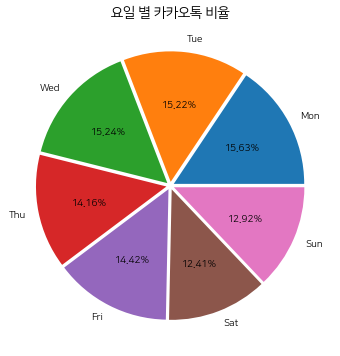

In [16]:
d = dict(zip(weekdays, weekdays_cnt))
printPie(d, '요일 별 카카오톡 비율')
# list(d.keys())

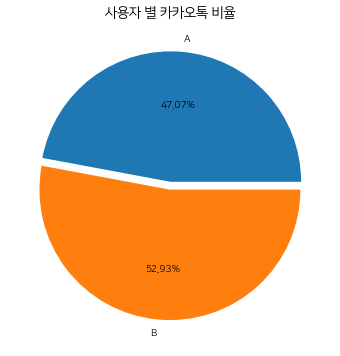

In [17]:
d = makeDict(df_origin,'sender')
printPie(d, '사용자 별 카카오톡 비율')

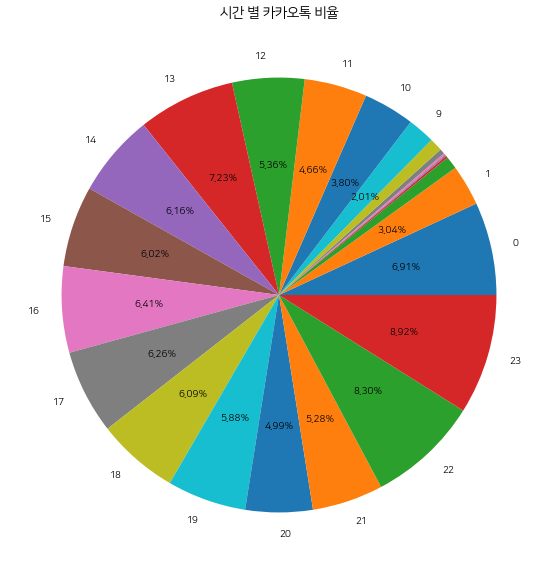

In [18]:
d=makeDict(df_origin,'hour')
printPie(d,'시간 별 카카오톡 비율',exp=0.0,fig=[10,10],min_pct=2)

In [ ]:
print(d)

In [ ]:
plt.rc('font', family='NanumSquare_ac')
fig, ax = plt.subplots(figsize=(12,6))
g = sns.kdeplot(df['time'][(df['sender'] == 'A')], color='red', shade = True)
g = sns.kdeplot(df['time'][(df['sender'] == 'B')],shade = True)
g.set_xlabel("시각")
g.set_ylabel("빈도 수")
plt.title("전체 채팅 분포 비율")
g = g.legend(["A",'B'])

In [ ]:
df['time'][(df['sender']=='A')]

In [ ]:
plt.rc('font', family='NanumSquare_ac')
fig, ax = plt.subplots(figsize=(12,6))
sns.set_style('ticks')
g=sns.countplot(x='hour', hue='sender',palette='Pastel1', data=df)
plt.title('시각에 따른 사용자 별 메세지 전송 수')
plt.show()

In [ ]:
plt.rc('font', family='NanumSquare_ac')
fig, ax = plt.subplots(figsize=(12,6))
sns.set_style('ticks')
g=sns.countplot(x='hour',palette='Pastel1', data=df)
plt.title('시각에 따른 메세지 전송 수')
plt.show()

In [ ]:
plt.rc('font', family='NanumSquare_ac')
fig, ax = plt.subplots(figsize=(12,6))
sns.set_style('ticks')
g=sns.countplot(x='year',palette='Pastel1', data=df)
plt.title('년도에 따른 메세지 전송 수')
plt.show()

In [ ]:
plt.rc('font', family='NanumSquare_ac')
fig, ax = plt.subplots(figsize=(12,6))
lables = df['time'].